### Carregando dados

In [9]:
# pipenv install scikit-learn scipy pandas matplotlib statsmodel fastapi uvicorn pydantic pingouin seaborn ipykernel

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [11]:
# Carregando dataset
df_irrigacao = pd.read_csv('./datasets/dados_de_irrigacao.csv')

In [12]:
# Checar estrutura do dataset
df_irrigacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [ ]:
# Remover espaço no nome das colunas
# removendo nome maiusculo das colunas
# Renomear as colunas
df_irrigacao.columns=[
  'horas_irrigacao',
  'area_irrigada',
  'area_irrigada_angulo'
]

# area_irrigada_angulo será nosso target (variavel dependente)

In [14]:
# Visalizar o topo do dataframe
df_irrigacao.head(10)

,horas_irrigacao,area_irrigada,area_irrigada_angulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


In [15]:
# Visalizar ultimos 10 do dataframe
df_irrigacao.tail(10)

,horas_irrigacao,area_irrigada,area_irrigada_angulo
289,290,29000,19333.333333
290,291,29100,19400.000000
291,292,29200,19466.666667
292,293,29300,19533.333333
293,294,29400,19600.000000
294,295,29500,19666.666667
295,296,29600,19733.333333
296,297,29700,19800.000000
297,298,29800,19866.666667
298,299,29900,19933.333333


### EDA

In [16]:
# Verificar se existem valores nulos
df_irrigacao.isnull().sum()

horas_irrigacao         0
area_irrigada           0
area_irrigada_angulo    0
dtype: int64

In [17]:
# Verificar medidas estatisticas das variaveis
df_irrigacao.describe()

,horas_irrigacao,area_irrigada,area_irrigada_angulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: >

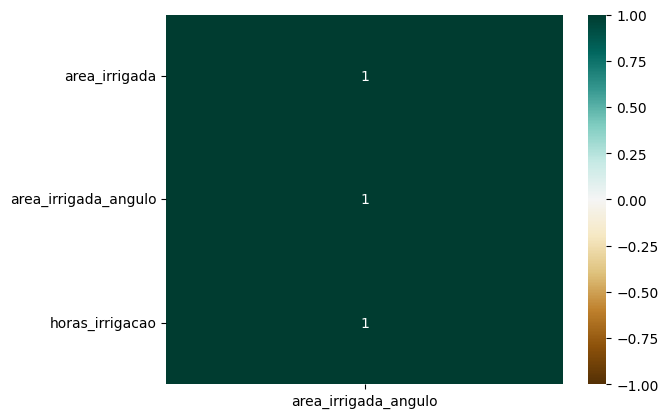

In [38]:
# Entender a correlação com o resultado
# Mapa de Correlação só com a variavel Target (resultado)
# Verificar qual tem maior correlação e qual tem a menor
sns.heatmap(df_irrigacao.corr()[['area_irrigada_angulo']]
   .sort_values(by='area_irrigada_angulo', ascending=False), 
                vmin=-1,
                vmax=1,
                annot=True,
                cmap='BrBG')

array([[<Axes: xlabel='horas_irrigacao', ylabel='horas_irrigacao'>,
        <Axes: xlabel='area_irrigada', ylabel='horas_irrigacao'>,
        <Axes: xlabel='area_irrigada_angulo', ylabel='horas_irrigacao'>],
       [<Axes: xlabel='horas_irrigacao', ylabel='area_irrigada'>,
        <Axes: xlabel='area_irrigada', ylabel='area_irrigada'>,
        <Axes: xlabel='area_irrigada_angulo', ylabel='area_irrigada'>],
       [<Axes: xlabel='horas_irrigacao', ylabel='area_irrigada_angulo'>,
        <Axes: xlabel='area_irrigada', ylabel='area_irrigada_angulo'>,
        <Axes: xlabel='area_irrigada_angulo', ylabel='area_irrigada_angulo'>]],
      dtype=object)

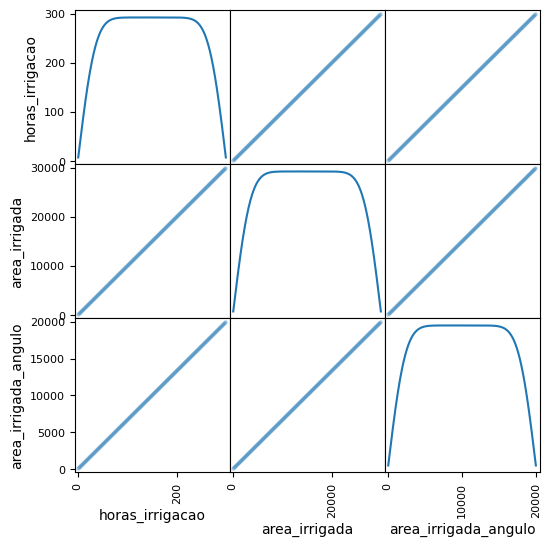

In [23]:
# Plot de Scatter (Dispersão) com Correlação (Distribution)

pd.plotting.scatter_matrix(df_irrigacao, alpha=0.2, figsize=(6,6), diagonal='kde')

<Axes: xlabel='horas_irrigacao', ylabel='area_irrigada'>

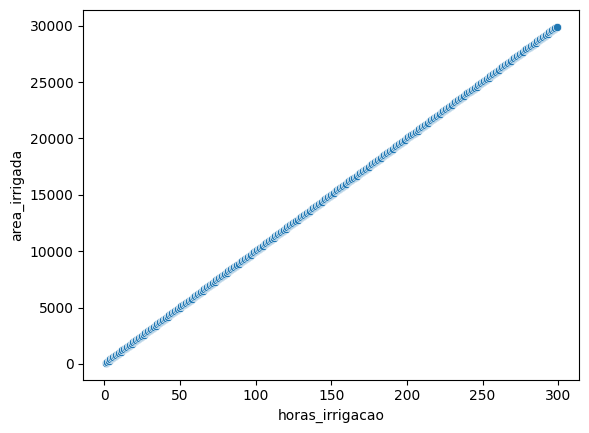

In [25]:
# Plot de Dispersão
# X = horas_irrigacao
# Y = area_irrigada
sns.scatterplot(data=df_irrigacao, x='horas_irrigacao', y='area_irrigada')

<Axes: xlabel='horas_irrigacao', ylabel='area_irrigada_angulo'>

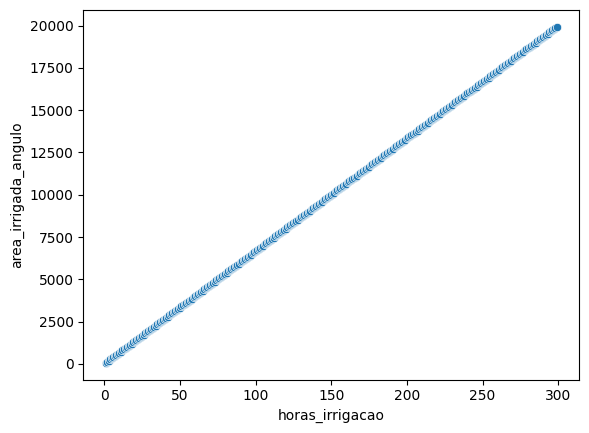

In [26]:
# Plot de Dispersão
# X = horas_irrigacao
# Y = area_irrigada_angulo
sns.scatterplot(data=df_irrigacao, x='horas_irrigacao', y='area_irrigada_angulo')

### Detectando outliers

<Axes: ylabel='area_irrigada'>

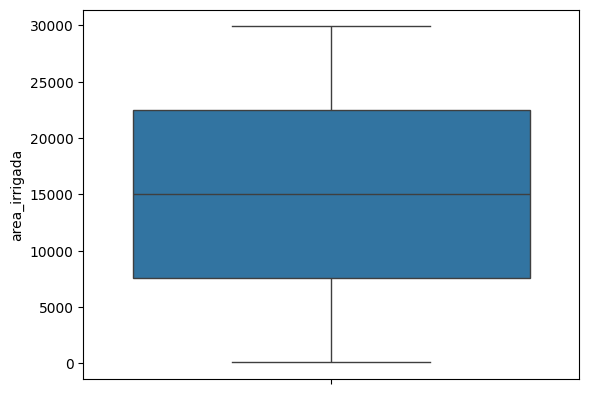

In [27]:
# Plot Boxplot
sns.boxplot(data=df_irrigacao,y='area_irrigada')

<Axes: ylabel='horas_irrigacao'>

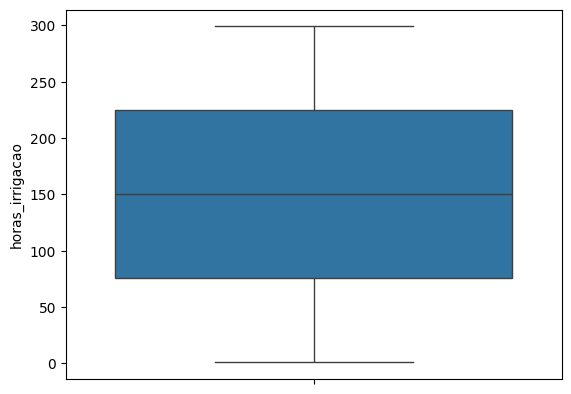

In [28]:
# Plot Boxplot
sns.boxplot(data=df_irrigacao,y='horas_irrigacao')

<Axes: ylabel='area_irrigada_angulo'>

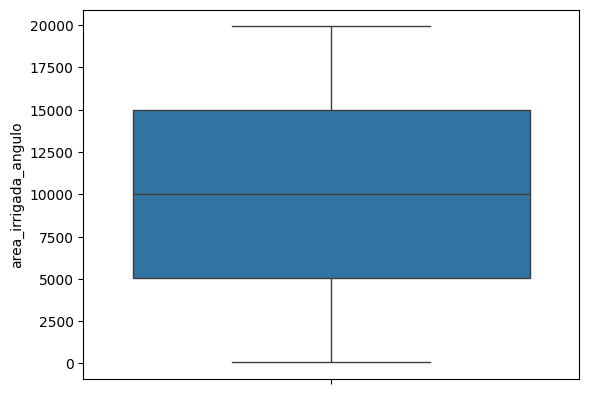

In [29]:
# Plot Boxplot
sns.boxplot(data=df_irrigacao,y='area_irrigada_angulo')

<Axes: xlabel='horas_irrigacao', ylabel='area_irrigada'>

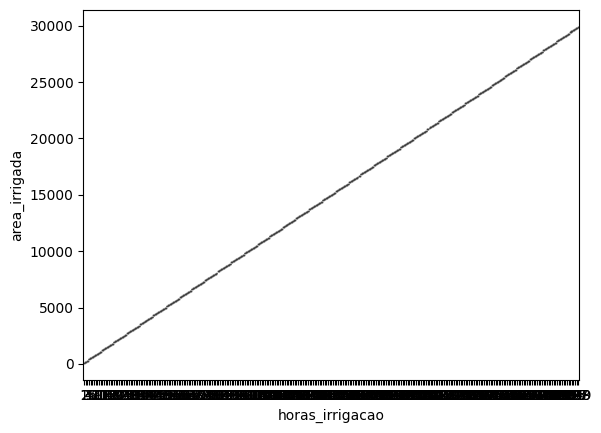

In [ ]:
## Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(data=df_irrigacao,y='area_irrigada', x='horas_irrigacao')

<Axes: xlabel='horas_irrigacao', ylabel='area_irrigada_angulo'>

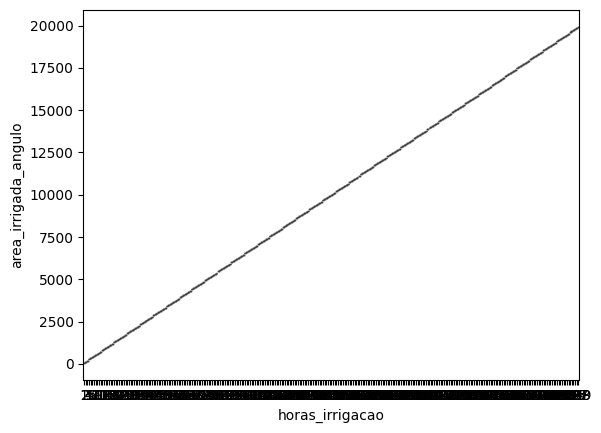

In [39]:
## Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(data=df_irrigacao,y='area_irrigada_angulo', x='horas_irrigacao')

<Axes: >

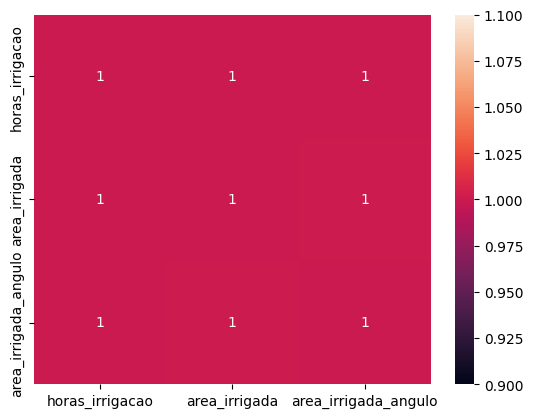

In [31]:
# Verificar Correlação - Pearson
sns.heatmap(df_irrigacao.corr('pearson'), annot=True)

<Axes: >

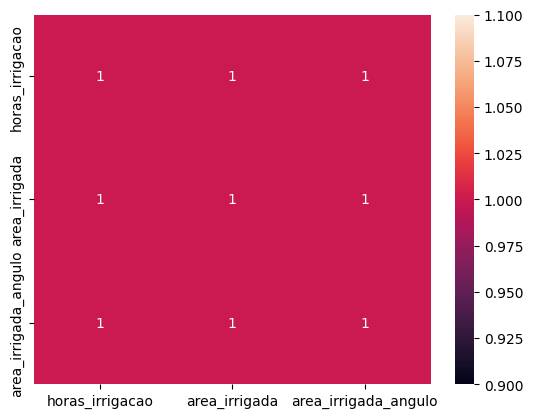

In [33]:
# Verificar Correlação - Spearman
sns.heatmap(df_irrigacao.corr('spearman'), annot=True)

<Axes: xlabel='horas_irrigacao', ylabel='area_irrigada'>

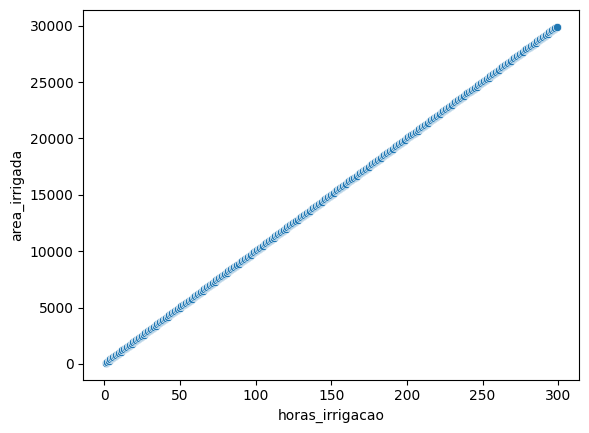

In [34]:

# Cruzamento de variaveis numéricas
sns.scatterplot(data=df_irrigacao, x='horas_irrigacao', y='area_irrigada')

<Axes: xlabel='horas_irrigacao', ylabel='area_irrigada_angulo'>

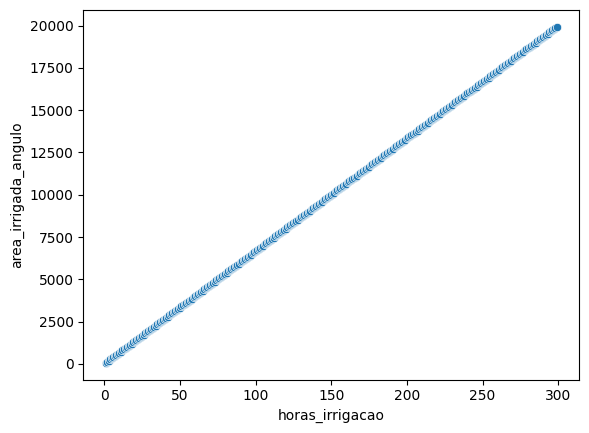

In [35]:
# Cruzamento de variaveis numéricas
sns.scatterplot(data=df_irrigacao, x='horas_irrigacao', y='area_irrigada_angulo')

<Axes: xlabel='area_irrigada_angulo', ylabel='area_irrigada'>

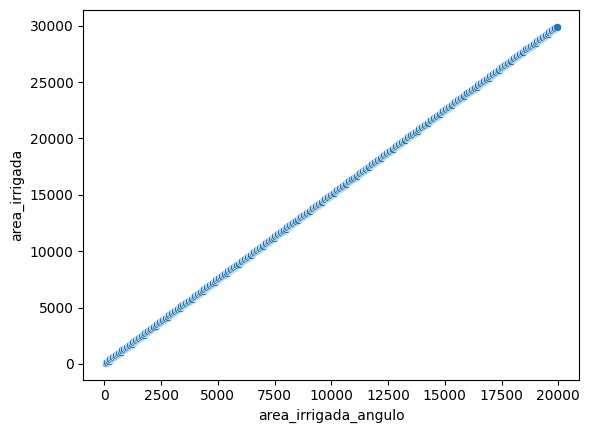

In [36]:
# Cruzamento de variaveis numéricas
sns.scatterplot(data=df_irrigacao, x='area_irrigada_angulo', y='area_irrigada')

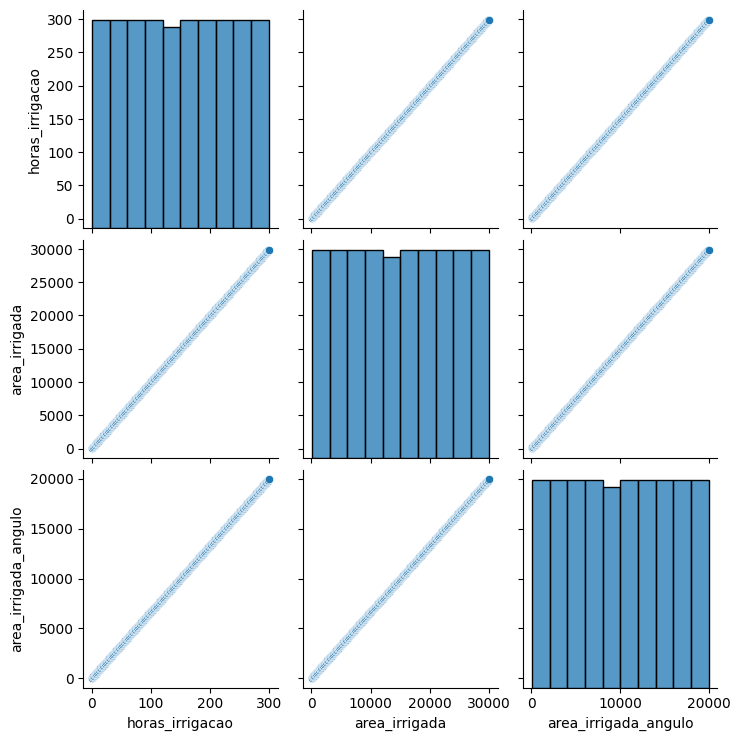

In [37]:
# Análise dos gráficos com Histograma
sns.pairplot(df_irrigacao)

### Treinamento do modelo

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [48]:
# Dividir dataset entre treino e teste
# Ajustaremos o shape pois temos apenas uma feature (variavel independente)
X = df_irrigacao[['horas_irrigacao']].values.reshape(-1,1)
y = df_irrigacao['area_irrigada_angulo'].values.reshape(-1,1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [49]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [50]:
# Treinamento do modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Imprimindo equação da reta
# y - aX + b
print("A equação da reta é: y = {:4f}X + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é: y = 66.666667X + -0.000000


### Validando modelo - Métricas

In [52]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [53]:
# Calcular o R2
r2 = r2_score(y_test, y_pred)
r2

1.0

In [54]:
# MAE é menos sensível a outliers
mean_absolute_error(y_test,y_pred)

1.6854073692229576e-12

In [55]:
# MSE é mais sensível a outiliers e penaliza grandes erros
mean_squared_error(y_test, y_pred)

5.149387798308218e-24

In [56]:
# penaliza grandes erros mas tira uma raiz quadrada.

from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

2.2692262554245704e-12

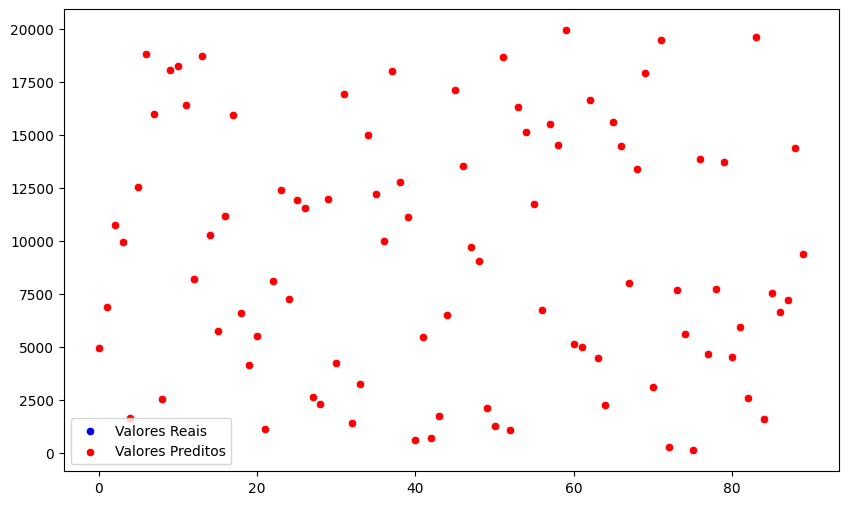

In [58]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))

sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

### Análise de resíduos

In [59]:
# Calcular residuos
residuos = y_test - y_pred

In [60]:
# Calcular os resíduos padronizados (standarization)
# Para cada elemento de um conjunto (x - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

In [64]:

# Teste de normalidade - Kolmogorov-Smirnov
# se for h0 - Segue distribuição normal
# se for h1 - Não segue distribuição normal
# Se o p-valor > 0.05 a gente não rejeita o H0, caso contrário, reijeitamos

stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste: {} e P-Valor: {}"
.format(stat_ks,p_valor_ks))

Estatística do teste: 0.49999999999856004 e P-Valor: 2.486951502308412e-21


In [68]:
# Predição de exemplo
# usando numpy para manipular array
# pipenv install numpy
import numpy as np
horas_exemplo = np.array([[15]])
area_predita = reg_model.predict(horas_exemplo)
print(f"Para 15 horas de irrigação, a área irrigada por ângulo prevista é: {area_predita[0][0]}")

Para 15 horas de irrigação, a área irrigada por ângulo prevista é: 999.9999999999966


In [69]:
# Se eu regar 30 horas, qual a pontuação prevista pelo modelo ?
reg_model.predict([[30]])

array([[2000.]])